Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

**Group 6:**

Name | Contribution 
--- | ---
1. Himanshu Chuphal (guschuhi@student.gu.se) | 12 H
2. Claudio Aguilar Aguilar(claagu@student.chalmers.se) | 12 H

---

In [ ]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('Train: X=%s, y=%s' % (x_train.shape, lbl_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, lbl_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


**1) Preprocessing.In the notebook, the data is downloaded from an external server imported into the notebook environment using the mnist.load_data()function call. Explain the data pre-processing high-lighted in the notebook.**

**[Answer]** After loading dataset into varaibles using mnist.load_data() from the previous cell, which gives about 60000 examples in the training dataset and 10000 in the test dataset and the images are square with 28×28pixel.

Since the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255 and there is no known best way to scale the pixel values for modeling, but some scaling is required.

Therefore, we normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1], which is done by converting the data_type from unsigned integers to floats, then dividing the pixel values by the maximum value (255).

There are 10 classes (num_classes) and the classes are represented as unique integers. we use an one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We do this using to_categorical() utility function.

In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8092 - accuracy: 0.7631 - val_loss: 0.2581 - val_accuracy: 0.9245
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2450 - accuracy: 0.9289 - val_loss: 0.1932 - val_accuracy: 0.9427
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1923 - accuracy: 0.9443 - val_loss: 0.1658 - val_accuracy: 0.9504
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.9548 - val_loss: 0.1373 - val_accuracy: 0.9589
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1312 - accuracy: 0.9630 - val_loss: 0.1291 - val_accuracy: 0.9618
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1152 - accuracy: 0.9662 - val_loss: 0.1176 - val_accuracy: 0.9642
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9717 - val_loss: 0.1129 - val_accuracy: 0.9672
Epoch 

In [ ]:
# get the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


#2)4points. Networkmodel, training, and changing hyper-parameters.

A) How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is thetotal number of parameters for the network?Why does the input and output layers have the dimensions they have?

**[Answer]**
- Network Layers and neurons in each layer (in bold)

Layer (type)  ::               Output Shape   ::           Param   

**Input** :flatten (Flatten) ::           (None, **784**) ::              0         
_________________________________________________________________
**1st:** dense (Dense)       ::         (None, **64**)    ::           50240     
_________________________________________________________________
**2nd:** dense_1 (Dense)     ::         (None, **64**)    ::            4160      
_________________________________________________________________
**3rd:** dense_2 (Dense)     ::         (None, **10**)    ::            650       


- Activation functions - There are 2 uses here :

1.) *ReLU* - The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance. ReLu returns the element-wise maximum of (0, x), x is the input tensor. The advantage of using this function is that the neurons those get a negative value don't get activated and their output is not considered in the next layer.

2.) *Softmax*-  It is alogistic regression function that normalizes values to be between (0,1) and is needed to convert the values to probabilities.

- Total Number of params :: **Total params: 55,050**
For each neuron layer : we can calculate the total number of params using ((neurons*previous layer neurons)+ 1 * neurons)
The input_layer:: 0

First dense_layer:: 64 * 784 + 1 * 64 = 50176

2nd dense_layer_1:: 64 * 64 +64 = 4160

3rd dense_layer_2:: 10 * 64 + 64 = 704

Total :: 50176 + 4160 + 704 = 55,050 (Total params: 55,050 andTrainable params: 55,050)

- *Why does the input and output layers have the dimensions they have?*

The mnist images are square with big 28×28 pixel. The first flatten (Flatten) layer with (784, 1) neurons probably flattens the big 28×28 squares to a 1D array.

As there are a total of 10 classes, thereby we have 10 neurons in the output layer (as is explained before).

**B) What loss-function is used to train the network? What is the functional form(mathematical expression) of the loss function? and how should we interpret it?Why is it appropriate for the problem at hand?**

**[Answer]** 

The loss-function used to train the network is the **categorical crossentropy loss** from the keras API. The functional form (mathematical expression) is: Loss $= -\sum \limits_{i=1}^{output\\size} y_i\cdot log\hat{y}_i$

Where $\hat{y}_i$ is the i-th scalar value in the model output, $y_i$ the target value and output size the number of scalar values in the model output.

This loss function measures the distinguishability between two discrete probability distributions.
$y_i$ is the probability that event i occurs and the sum of all $y_i$ is 1 which means that only one event may occur. A minus sign is present to ensure that the loss gets reduced when the distributions get closer to each other.

The loss function considers only one example belonging to a specific category with probability 1 and the others 0.

Which is well suited for our problem at hand because we want to learn the model to give a high probability to the correct digit and a low to the other digits.





**C) Train the network for 10 epochs and plot the training and validation accuracy for each epoch.**

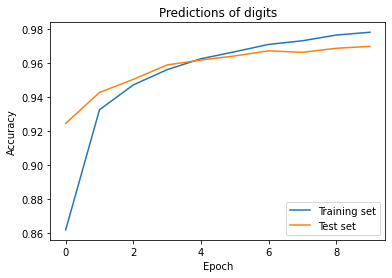

In [ ]:
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('Predictions of digits')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()

Here we can see that the model is a little bit off but does quite a good job on predicting the values. In this example we only run for 40 epochs, training the model for more epochs can make the training set more accurate to the test set or also make the model overfit/underfit which is when a validation set comes in handy because then we will know when to stop training, which is when performance on the validation data stops improving.

**D)Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. Train for 40epochs. What is the best validation accuracy you can achieve? –Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reachavalidation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay(L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden unitsand train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? –If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)**

**[Answer]**

In [ ]:
def update_model(reg_factor, epochs):
  #make network wider
  model2 = Sequential()
  model2.add(Flatten())
  model2.add(Dense(500, activation='relu', activity_regularizer=keras.regularizers.l2(reg_factor))) 
  # 500 hidden units + l2 weight decay on the regularization factors from 0.000001 - 0.001
  model2.add(Dense(300, activation='relu', activity_regularizer=keras.regularizers.l2(reg_factor))) 
  # 300 hidden units + l2 weight decay on the regularization factors from 0.000001 - 0.001
  model2.add(Dense(num_classes, activation='softmax')) 
  # convert vector of numbers into vector of probabilites

  #define the model
  model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr = 0.1),
              metrics=['accuracy'])
  #train the model
  fit_info2 = model2.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(x_test, y_test))
  
  return fit_info2.history['val_accuracy'][-1] 
  # return the last element which is the best validation accuracy we get.

val_accuracys = []
reg_factors = [0.001, 0.0001, 0.00005, 0.00001, 0.000001] 
#[0.000001, 0.00005, 0.00001, 0.0001, 0.001] #5 regularization factors from 0.000001 to 0.001

#5 regularization factors from 0.000001 to 0.001 and 3 replicas
for reg_f in reg_factors:
  temp=[]
  for rep_network in range(0,3):
    temp.append(update_model(reg_factor=reg_f, epochs=40))
  val_accuracys.append(temp)


Epoch 1/40
469/469 [==============================] - 6s 12ms/step - loss: 0.7652 - accuracy: 0.8335 - val_loss: 0.2776 - val_accuracy: 0.9414
Epoch 2/40
469/469 [==============================] - 5s 11ms/step - loss: 0.2550 - accuracy: 0.9485 - val_loss: 0.1974 - val_accuracy: 0.9605
Epoch 3/40
469/469 [==============================] - 5s 11ms/step - loss: 0.1831 - accuracy: 0.9650 - val_loss: 0.1614 - val_accuracy: 0.9682
Epoch 4/40
469/469 [==============================] - 5s 12ms/step - loss: 0.1468 - accuracy: 0.9734 - val_loss: 0.1420 - val_accuracy: 0.9721
Epoch 5/40
469/469 [==============================] - 5s 12ms/step - loss: 0.1244 - accuracy: 0.9784 - val_loss: 0.1313 - val_accuracy: 0.9741
Epoch 6/40
469/469 [==============================] - 5s 11ms/step - loss: 0.1058 - accuracy: 0.9831 - val_loss: 0.1169 - val_accuracy: 0.9769
Epoch 7/40
469/469 [==============================] - 5s 12ms/step - loss: 0.0916 - accuracy: 0.9870 - val_loss: 0.1104 - val_accuracy: 0.9786

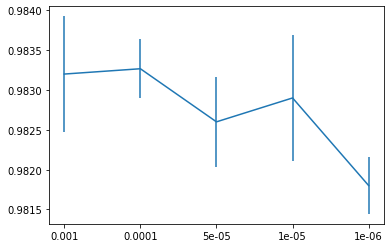

In [ ]:
#Plot the final validation accuracy with standard deviation
x = list(map(str, reg_factors))
y = list(map(np.mean, val_accuracys))
e = list(map(np.std, val_accuracys))

plt.errorbar(x, y, yerr=e)
plt.show()

**How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)**

**[Answer]**

As seen in the graph the highest accuracy we get is around 0.9838. We did not quite get the same result as Hinton, which we believe can be due to us not choosing the most proper regularization factors which is something that is not mentioned in the MNIST database. Maybe by modfying the regularization factors we can get closer or get the same result as Hinton, but since it takes such a long time we just let it be. Another thing that was different was the batch sizes, Hinton had a batch size of 100 while we have 128, maybe this could also be something related to the result. The nr of epochs could be a factor, in the science paper Hinton uses a maxepoch of 50 while we use 40.

#3) 2points. Convolutional layers.

**A) Design a model that makes use of at least one convolutional layer–how performant a model can you get? --According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.**

**[Answer]**





In [ ]:
#model with convolutional layer
convModel = Sequential()
convModel.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))

convModel.add(Conv2D(64, (3, 3), activation='relu'))
convModel.add(MaxPooling2D(pool_size=(2, 2)))
convModel.add(Dropout(0.25))# helps to prevent overfitting
convModel.add(Flatten())
convModel.add(Dense(128, activation='relu'))
convModel.add(Dropout(0.5))# helps to prevent overfitting
convModel.add(Dense(num_classes, activation='softmax'))

convModel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=['accuracy'])

fit_info_convModel = convModel.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=40,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = convModel.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Epoch 1/40
469/469 [==============================] - 142s 302ms/step - loss: 0.7713 - accuracy: 0.7521 - val_loss: 0.1057 - val_accuracy: 0.9681
Epoch 2/40
469/469 [==============================] - 140s 299ms/step - loss: 0.1659 - accuracy: 0.9511 - val_loss: 0.0632 - val_accuracy: 0.9792
Epoch 3/40
469/469 [==============================] - 140s 298ms/step - loss: 0.1177 - accuracy: 0.9653 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 4/40
469/469 [==============================] - 139s 297ms/step - loss: 0.0922 - accuracy: 0.9714 - val_loss: 0.0431 - val_accuracy: 0.9853
Epoch 5/40
469/469 [==============================] - 139s 297ms/step - loss: 0.0782 - accuracy: 0.9768 - val_loss: 0.0401 - val_accuracy: 0.9864
Epoch 6/40
469/469 [==============================] - 139s 297ms/step - loss: 0.0704 - accuracy: 0.9782 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 7/40
469/469 [==============================] - 137s 293ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0392 -

After creating our convolutional layer we apply a MaxPooling2D layer which reduces the dimensions of the feature maps, thus, reducing the number of parameters to learn and computational load. Maxpooling might also reduce overfitting. 

Maxpooling will select the maximum element(higher valued pixels that are the most activated) from each region generated by the convolutional layer and preserve these values in a 2x2 matrix. This makes the model more robust to variations in the position of the features in the input image.

Then we add a dropout layer which is used to prevent overfitting since it drops neurons out of the network during training so other neurons can step in and make the predictions for the missing neurons, the network then becomes less sensitive to specific weights and more generalized.

We then flatten the network, converting a matrix into a single array.

We then add a Dense layer which is a neural network. Our dense layer has 128 units(neurons) which is our batch size.

Another dropout layer is added with  probability of 0.5 in order to retain the output of each node in a hidden layer.

And finally at last we have the output layer with 10 units which is the number of possible outputs/predictions classes that we have(0-9).


**B)Discuss the differences and potential benefits of using convolutional layers over fully connected onesfor the particular application?**

**[Answer]**

In a fully connected layer each neuron is connected to every neuron in the previous layer where each connection has it's own weight. This makes it more of a general principle that does not make any assumptions about the features in the data. Due to the mass of connections it becomes very expensive in terms of computation and memory.

In a convolutional layer each neuron is instead only connected to a few near(local) neurons in the previous layer. Each neuron is applied the same set of weights. 

The convolutional layer consists of feature maps that are connected directly to the inputs. The feature maps enables the network to detect different kinds of features of the image.

The weakness of a fully connected network is that if we shift a digit slightly to any direction, the network will no longer recognize the digit. This is something that convolutional networks can handle. Convolutional networks are most used today in networks for image recognition, which makes it a better option for our problem at hand.

Due to the reduction of connections, convolutional layers makes it cheaper in terms of computation and memory.


### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 7s 7ms/step - loss: 0.2441 - val_loss: 0.1544
Epoch 2/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1508 - val_loss: 0.1403
Epoch 3/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1386 - val_loss: 0.1344
Epoch 4/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1330 - val_loss: 0.1307
Epoch 5/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1295 - val_loss: 0.1285
Epoch 6/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1275 - val_loss: 0.1272
Epoch 7/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1253 - val_loss: 0.1264
Epoch 8/32
938/938 [==============================] - 6s 7ms/step - loss: 0.1243 - val_loss: 0.1260
Epoch 9/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1232 - val_loss: 0.1244
Epoch 10/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1221 - val_loss: 0.1238

#4)3points. Auto-Encodersfor denoising.

**A) The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model is achieved. Explain the role of the loss function? Draw a diagram of the model and include it in your report.Train the model with the settings given.**

**[Answer]**

The goal of this model is to be able to recreate the input images as accurate as possible by denoising the images after they have been compressed and added with noise. 

The model is constructed by 4 layers(2 encoders & 2 decoders) and one bottleneck(code) layer in between. 

In the encoder layers the images will be compressed and added with noise while trying to maintain sufficient information in order for the decoder to be able to recreate the images.

When entering the decoder layers the model tries to recreate the images with the information it received from the encoder. In this process the noise in the images will be removed and thus, the recreated images revealed.

In the first encoder layer the image have a 784 dimensional vector and then enters the second encoder layer where it reduces to a 128 dimensional vector. In between(bottleneck) the 2 types of layers(encoder & decoder) the image reduces to a 96 dimensional vector. When entering the decoder layers it first increases to a 128 dimensional vector and then enters the last layer where it increases to the original 784 dimensional vector(the recreated image).

The model trains by taking images from the mnist database as inputs and adding noise to them and then running them over the autoencoder to compare the output(recreated image) to the original input(original image).

The loss function describes the amount of information loss between the compressed and decompressed image. Thus, comparing the recreated image(denoised image) to the original image(input) to observe the amount of accuracy of the autoencoder. This information helps to update the weights to improve future predictions when back propagating.

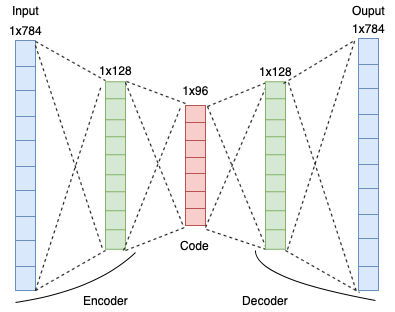

**B) Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1).Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoisedversions. (Hint: for visualization use imshow(), use the trained autoencoder from 4A to denoise the noisydigits). At what noise level does it become difficult to identify the seasoned digits for you? At what noise leveldoes the denoising stop working?**

**[Answer]**

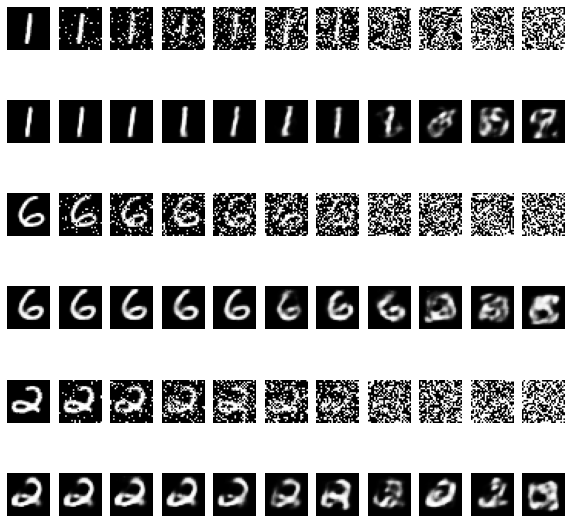

In [ ]:
#noises
noises = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#input images
num_images = 3
np.random.seed(42)
random_test_images = np.random.randint(flattened_x_test.shape[0], size=num_images)

#encoded and decoded images
encoded_imgs = encoder_only.predict(flattened_x_test)
decoded_imgs = autoencoder.predict(flattened_x_test)

#in order to plot images in row/column format style
fig, ax = plt.subplots(nrows=2*len(random_test_images), ncols=len(noises), figsize=(10,10))

for i, image_idx in enumerate(random_test_images):
  #plot original image
  ax[2*i][0].imshow(flattened_x_test[image_idx].reshape(28,28))
  ax[2*i][0].axis('off')
  for j, noise in enumerate(noises):
    #plot encoded image with varying noises
    ax[2*i][j].imshow(tf.reshape(salt_and_pepper(flattened_x_test[image_idx].reshape(1, -1),
                                                 noise_level=noise),(28,28)), cmap='gray')
    ax[2*i][j].axis('off')
    #plot reconstructed image
    ax[2*i+1][j].imshow(tf.reshape(autoencoder(salt_and_pepper(flattened_x_test[image_idx].reshape(1, -1),
                                                               noise_level=noise)),(28,28)), cmap='gray')
    ax[2*i+1][j].axis('off')
    

It becomes difficult to identify the digits at noise level 0.7(70%).
At the noise level of 0.5(50%) the quality of the recreation images start to decline, so we would say that it is at this point that the denoising stops working.

**C)Test whether denoising improves the classification with the best performing model you obtained in questions 2 or 3. Plot the accuracy as a function of noise-level for the seasoned and denoised datasets. Discuss your results.**

**[Answer]**

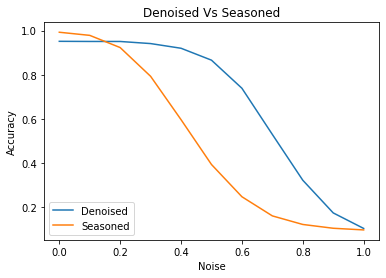

In [14]:
#score = convModel.evaluate(x_test, y_test, verbose=0)
#print("Accuracy: ", score[1])

#lists of accuracy for denoised and seasoned datasets
autoencoded_accuracy_list = []
seasoned_accuracy_list    = []

for i, noise in enumerate(noises):
  #denoised datasets
  x_autoencoded_test = tf.reshape(autoencoder(salt_and_pepper(flattened_x_test, noise_level=noise)),(10000,28,28,1))
  #loss and accuracy data
  autoencoded_score    = convModel.evaluate(x_autoencoded_test, y_test, verbose=0)
  autoencoded_loss     = autoencoded_score[0]
  autoencoded_accuracy = autoencoded_score[1]
  #add the accuracy to the list
  autoencoded_accuracy_list.append(autoencoded_accuracy)

  #seasoned datasets
  x_seasoned_test = tf.reshape(salt_and_pepper(flattened_x_test, noise_level=noise),(10000,28,28,1))
  #loss and accuracy data
  seasoned_score    = convModel.evaluate(x_seasoned_test, y_test, verbose=0)
  seasoned_loss     = seasoned_score[0]
  seasoned_accuracy = seasoned_score[1]
  #add the accuracy to the list
  seasoned_accuracy_list.append(seasoned_accuracy)

#plot
plt.plot(noises, autoencoded_accuracy_list)
plt.plot(noises, seasoned_accuracy_list)
plt.title('Denoised Vs Seasoned')
plt.ylabel('Accuracy')
plt.xlabel('Noise')
plt.legend(['Denoised', 'Seasoned'], loc='lower left')
plt.show()


What we can see from the plot is that the convolutional neural network with denoised input improves the classification drastically compared to the convolutional neural network with seasoned(noised) input, after reaching the noise level of around 0.1(10%). What it also shows us is what we mentioned before, that at noise level 0.5(50%) or even before that the accuracy decreases which is an indication that the denoising has stopped working.


**D) Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic“hand-written” digits? –Describe the procedure, implement it and show examples in your report.**

**[Answer]**

One way could be to train a Generative Adversarial Network(GAN) to generate "fake" handwritten digits. But how we did it here is that we instead of giving the autoencoder the flattened_x_test(original image of the digit) values we gave it the flattened_x_train_seasoned which are the "trained" attempts of recreating the digits, which will look more like handwritten, which in this case can be seen in the images plotted.

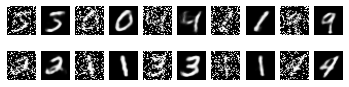

In [16]:
import random
encoded_imgs = encoder_only.predict(flattened_x_test)
decoded_imgs_seasoned = autoencoder.predict(flattened_x_train_seasoned)

for i in range(10): #4
    plt.subplot(5,10,1+i*2) #2,4
    plt.imshow(flattened_x_train_seasoned[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(5,10,2+i*2) #2,4
    plt.imshow((decoded_imgs_seasoned[i].reshape(28,28)+1)/2, cmap='gray')
    plt.axis('off')
plt.show()
